In [1]:

from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,ComplementNB
from catboost import Pool, cv
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline,make_pipeline
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

Using TensorFlow backend.


In [2]:
pd.set_option('max_columns', None)

In [3]:
df = pd.read_csv("Downloads/train.csv")
df_test = pd.read_csv("Downloads/test.csv")

In [4]:
print(df.shape)
print(df_test.shape)

(1628, 29)
(470, 28)


In [5]:
df

Id  Age  Attrition     BusinessTravel              Department  \
0        1   30          0         Non-Travel  Research & Development   
1        2   36          0      Travel_Rarely  Research & Development   
2        3   55          1      Travel_Rarely                   Sales   
3        4   39          0      Travel_Rarely  Research & Development   
4        5   37          0      Travel_Rarely  Research & Development   
...    ...  ...        ...                ...                     ...   
1623  1624   42          1  Travel_Frequently  Research & Development   
1624  1625   55          1      Travel_Rarely                   Sales   
1625  1626   25          1      Travel_Rarely                   Sales   
1626  1627   29          1      Travel_Rarely         Human Resources   
1627  1628   29          1      Travel_Rarely  Research & Development   

      DistanceFromHome  Education   EducationField  EmployeeNumber  \
0                    2          3          Medical             571   
1                   12          4    Life Sciences            1614   
2                    2          1          Medical             842   
3                   24          1    Life Sciences            2014   
4                    3          3            Other             689   
...                ...        ...              ...             ...   
1623                19          3          Medical             752   
1624                 2          1          Medical             842   
1625                 9          2    Life Sciences            1439   
1626                13          3  Human Resources            1844   
1627                18          1          Medical             315   

      EnvironmentSatisfaction  Gender  JobInvolvement                 JobRole  \
0                           3  Female               3   Laboratory Technician   
1                           3  Female               3  Manufacturing Director   
2                           3    Male               3         Sales Executive   
3                           1    Male               3      Research Scientist   
4                           3    Male               3  Manufacturing Director   
...                       ...     ...             ...                     ...   
1623                        3    Male               4      Research Scientist   
1624                        3    Male               3         Sales Executive   
1625                        1    Male               2    Sales Representative   
1626                        1    Male               2         Human Resources   
1627                        3    Male               2      Research Scientist   

      JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0                   4        Single           2564                   0   
1                   3       Married           4663                   9   
2                   4        Single           5160                   4   
3                   4        Single           4108                   7   
4                   3       Married           9434                   1   
...               ...           ...            ...                 ...   
1623                3      Divorced           2759                   6   
1624                4        Single           5160                   4   
1625                1       Married           4400                   3   
1626                1      Divorced           2335                   4   
1627                4        Single           2389                   1   

     OverTime  PercentSalaryHike  PerformanceRating  StockOptionLevel  \
0          No                 14                  3                 0   
1         Yes                 12                  3                 2   
2          No                 16                  3                 0   
3          No                 13                  3                 0   
4          No                 15                  3            

In [6]:
df_test

Id  Age     BusinessTravel              Department  DistanceFromHome  \
0      1   28      Travel_Rarely  Research & Development                 9   
1      2   31      Travel_Rarely                   Sales                 6   
2      3   37      Travel_Rarely  Research & Development                 6   
3      4   42      Travel_Rarely  Research & Development                 1   
4      5   45         Non-Travel  Research & Development                 4   
..   ...  ...                ...                     ...               ...   
465  466   32      Travel_Rarely  Research & Development                 2   
466  467   18  Travel_Frequently                   Sales                 3   
467  468   24      Travel_Rarely  Research & Development                23   
468  469   31      Travel_Rarely  Research & Development                23   
469  470   36      Travel_Rarely  Research & Development                 5   

     Education EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0            3        Medical             377                        4   
1            4        Medical             653                        1   
2            3        Medical             474                        3   
3            2  Life Sciences             827                        4   
4            2  Life Sciences             972                        3   
..         ...            ...             ...                      ...   
465          4  Life Sciences            1692                        4   
466          2        Medical            1624                        2   
467          3        Medical             639                        2   
468          3        Medical             367                        2   
469          4  Life Sciences            1651                        2   

     Gender  JobInvolvement                    JobRole  JobSatisfaction  \
0      Male               3         Research Scientist                4   
1      Male               4            Sales Executive                4   
2      Male               4         Research Scientist                1   
3    Female               2     Manufacturing Director                4   
4      Male               3      Laboratory Technician                2   
..      ...             ...                        ...              ...   
465    Male               3      Laboratory Technician                2   
466  Female               3       Sales Representative                4   
467    Male               4         Research Scientist                4   
468    Male               2  Healthcare Representative                4   
469  Female               3  Healthcare Representative                1   

    MaritalStatus  MonthlyIncome  NumCompaniesWorked OverTime  \
0         Married           2070                   1       No   
1        Divorced           5460                   4       No   
2        Divorced           5974                   4      Yes   
3         Married           6062                   9      Yes   
4         Married           4447                   1       No   
..            ...            ...                 ...      ...   
465        Single           1393                   1       No   
466        Single           1569                   1      Yes   
467       Married           2725                   1      Yes   
468       Married           5582                   0       No   
469       Married           8008                   4       No   

     PercentSalaryHike  PerformanceRating  StockOptionLevel  \
0                   23                  4                 1   
1                   22                  4                 2   
2                   13                  3                 2   
3                   13                  3                 1   
4                   12                  3                 0   
..                 ...                ...               ...   
465                 12                  3                

In [7]:
df.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

In [8]:
df.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [9]:
print(df.shape)
print(df_test.shape)

(1000, 28)
(470, 27)


In [10]:
df.describe()

Age    Attrition  DistanceFromHome    Education  \
count  1000.000000  1000.000000       1000.000000  1000.000000   
mean     36.883000     0.157000          9.145000     2.912000   
std       9.125052     0.363983          8.120956     1.028257   
min      18.000000     0.000000          1.000000     1.000000   
25%      30.000000     0.000000          2.000000     2.000000   
50%      36.000000     0.000000          7.000000     3.000000   
75%      43.000000     0.000000         13.000000     4.000000   
max      60.000000     1.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  \
count     1000.000000              1000.000000     1000.000000   
mean      1020.605000                 2.728000        2.727000   
std        606.009713                 1.095087        0.703538   
min          1.000000                 1.000000        1.000000   
25%        491.000000                 2.000000        2.000000   
50%       1008.000000                 3.000000        3.000000   
75%       1569.750000                 4.000000        3.000000   
max       2068.000000                 4.000000        4.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count      1000.000000    1000.000000         1000.000000        1000.000000   
mean          2.745000    6464.418000            2.704000          15.238000   
std           1.085889    4685.919516            2.490499           3.643162   
min           1.000000    1009.000000            0.000000          11.000000   
25%           2.000000    2874.000000            1.000000          12.000000   
50%           3.000000    4877.500000            2.000000          14.000000   
75%           4.000000    8393.000000            4.000000          18.000000   
max           4.000000   19999.000000            9.000000          25.000000   

       PerformanceRating  StockOptionLevel  TotalWorkingYears  \
count        1000.000000       1000.000000        1000.000000   
mean            3.153000          0.791000          11.229000   
std             0.360168          0.850907           7.766652   
min             3.000000          0.000000           0.000000   
25%             3.000000          0.000000           6.000000   
50%             3.000000          1.000000          10.000000   
75%             3.000000          1.000000          15.000000   
max             4.000000          3.000000          38.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
count            1000.000000     1000.000000         1000.000000   
mean                2.841000        6.979000            4.225000   
std                 1.300542        6.232608            3.698115   
min                 0.000000        0.000000            0.000000   
25%                 2.000000        3.000000            2.000000   
50%                 3.000000        5.000000            3.000000   
75%                 3.000000        9.000000            7.000000   
max                 6.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  CommunicationSkill  \
count              1000.000000           1000.000000         1000.000000   
mean                  2.152000              4.058000            3.041000   
std                   3.199865              3.598831            1.413973   
min                   0.000000              0.000000            1.000000   
25%                   0.000000              2.000000            2.000000   
50%                   1.000000              3.000000            3.000000   
75%                   2.000000              7.000000            4.000000   
max                  15.000000             17.000000            5.000000   

       Behaviour  
count     1000.0  
mean         1.0  
std          0.0  
min          1.0  
25%          1.0  
50%          1.0  
75%          1.0  
max          1.0

In [11]:
df.drop(['Behaviour'],axis=1,inplace=True)
df_test.drop(['Behaviour'],axis=1,inplace=True)

In [12]:
df.select_dtypes(include=['object', 'category'])

BusinessTravel              Department EducationField  Gender  \
0           Non-Travel  Research & Development        Medical  Female   
1        Travel_Rarely  Research & Development  Life Sciences  Female   
2        Travel_Rarely                   Sales        Medical    Male   
3        Travel_Rarely  Research & Development  Life Sciences    Male   
4        Travel_Rarely  Research & Development          Other    Male   
..                 ...                     ...            ...     ...   
995         Non-Travel                   Sales        Medical    Male   
996      Travel_Rarely  Research & Development  Life Sciences  Female   
997      Travel_Rarely                   Sales        Medical    Male   
998      Travel_Rarely  Research & Development        Medical  Female   
999  Travel_Frequently                   Sales      Marketing  Female   

                    JobRole MaritalStatus OverTime  
0     Laboratory Technician        Single       No  
1    Manufacturing Director       Married      Yes  
2           Sales Executive        Single       No  
3        Research Scientist        Single       No  
4    Manufacturing Director       Married       No  
..                      ...           ...      ...  
995         Sales Executive        Single       No  
996  Manufacturing Director        Single      Yes  
997         Sales Executive        Single       No  
998  Manufacturing Director        Single      Yes  
999         Sales Executive       Married       No  

[1000 rows x 7 columns]

In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

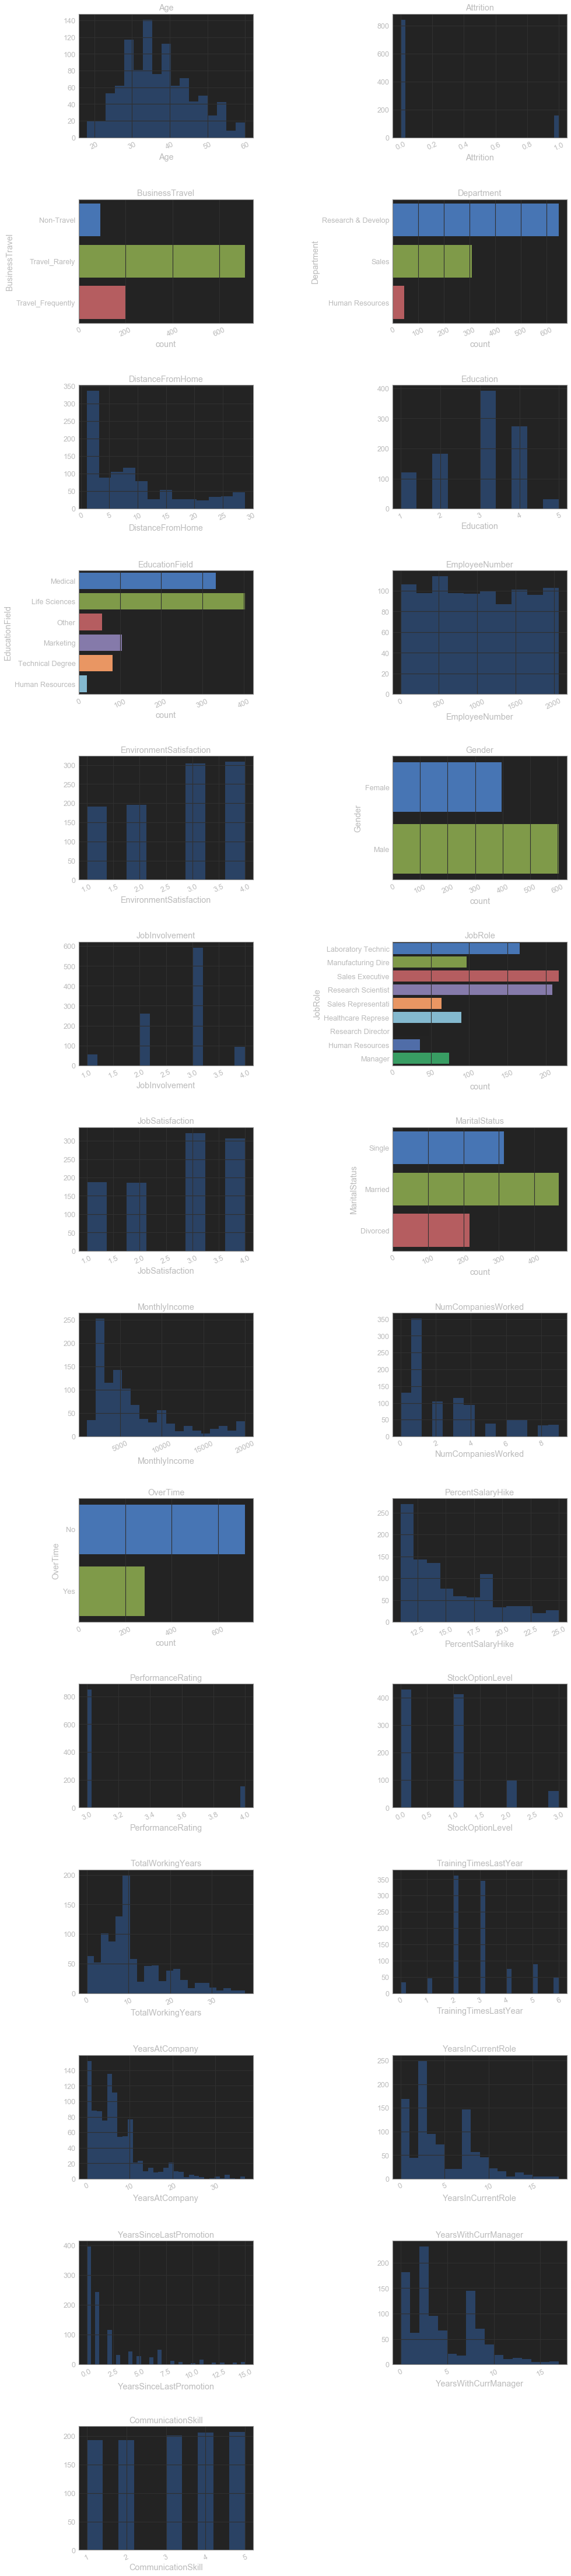

In [14]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
#     plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column],kde=False)
            plt.xticks(rotation=25)
plot_distribution(df, cols=2, width=15, height=80, hspace=0.5, wspace=0.8)


In [14]:
df.BusinessTravel.value_counts()

Travel_Rarely        709
Travel_Frequently    199
Non-Travel            92
Name: BusinessTravel, dtype: int64

In [15]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df_test['BusinessTravel']=df_test['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

In [16]:
df.Department.value_counts()

Research & Development    647
Sales                     308
Human Resources            45
Name: Department, dtype: int64

In [17]:
a=df.groupby('Department')['Attrition'].sum().values
b=df.groupby('Department')['Attrition'].count().values
a/b

array([0.2       , 0.12828439, 0.21103896])

In [18]:
df['Department'] = df['Department'].map( {'Sales':0.21103896, 'Human Resources':0.2, 'Research & Development':0.12828439} )
df_test['Department'] = df_test['Department'].map( {'Sales':0.21103896, 'Human Resources':0.2, 'Research & Development':0.12828439} )
df.Department=df.Department.round(decimals=2)
df_test.Department=df_test.Department.round(decimals=2)

In [19]:
df.JobRole.value_counts()

Sales Executive              217
Research Scientist           209
Laboratory Technician        166
Manufacturing Director        97
Healthcare Representative     90
Manager                       74
Sales Representative          64
Research Director             47
Human Resources               36
Name: JobRole, dtype: int64

In [20]:
a=df.groupby('JobRole')['Attrition'].sum().values
b=df.groupby('JobRole')['Attrition'].count().values
a/b

array([0.05555556, 0.25      , 0.21686747, 0.05405405, 0.06185567,
       0.        , 0.15789474, 0.17050691, 0.421875  ])

In [21]:
df['JobRole'] = df['JobRole'].map( {'Sales Representative':0.421875, 'Human Resources':0.25, 'Laboratory Technician':0.21686747,'Sales Executive':0.17050691,'Research Scientist':0.15789474,'Manufacturing Director':0.06185567,'Healthcare Representative':0.05555556,'Manager':0.05405405,'Research Director':0} )
df_test['JobRole'] = df_test['JobRole'].map( {'Sales Representative':0.421875, 'Human Resources':0.25, 'Laboratory Technician':0.21686747,'Sales Executive':0.17050691,'Research Scientist':0.15789474,'Manufacturing Director':0.06185567,'Healthcare Representative':0.05555556,'Manager':0.05405405,'Research Director':0} )
df.JobRole=df.JobRole.round(decimals=2)
df_test.JobRole=df_test.JobRole.round(decimals=2)

In [22]:
df.EducationField.value_counts()

Life Sciences       403
Medical             333
Marketing           105
Technical Degree     82
Other                57
Human Resources      20
Name: EducationField, dtype: int64

In [23]:
a=df.groupby('EducationField')['Attrition'].sum().values
b=df.groupby('EducationField')['Attrition'].count().values
a/b

array([0.25      , 0.13647643, 0.21904762, 0.14114114, 0.12280702,
       0.24390244])

In [24]:
df['EducationField'] = df['EducationField'].map( {'Life Sciences':0.13647643, 'Medical':0.14114114, 'Marketing':0.21904762, 'Technical Degree':0.24390244, 'Other':0.12280702, 'Human Resources':0.25})
df_test['EducationField'] = df_test['EducationField'].map( {'Life Sciences':0.13647643, 'Medical':0.14114114, 'Marketing':0.21904762, 'Technical Degree':0.24390244, 'Other':0.12280702, 'Human Resources':0.25})
df.EducationField=df.EducationField.round(decimals=2)
df_test.EducationField=df_test.EducationField.round(decimals=2)

In [25]:
encoder = LabelEncoder()
df["OverTime"] = encoder.fit_transform(df["OverTime"])
df_test["OverTime"] = encoder.fit_transform(df_test["OverTime"])
df["Gender"] = encoder.fit_transform(df["Gender"])
df_test["Gender"] = encoder.fit_transform(df_test["Gender"])

In [26]:
df.MaritalStatus.value_counts()

Married     469
Single      314
Divorced    217
Name: MaritalStatus, dtype: int64

In [27]:
a=df.groupby('MaritalStatus')['Attrition'].sum().values
b=df.groupby('MaritalStatus')['Attrition'].count().values
a/b

array([0.11520737, 0.1130064 , 0.25159236])

In [28]:
df['MaritalStatus']= df['MaritalStatus'].map({'Single': 0.25159236, 'Divorced': 0.11520737, 'Married': 0.1130064})
df_test['MaritalStatus']= df_test['MaritalStatus'].map({'Single': 0.25159236, 'Divorced': 0.11520737, 'Married': 0.1130064})
df.MaritalStatus=df.MaritalStatus.round(decimals=2)
df_test.MaritalStatus=df_test.MaritalStatus.round(decimals=2)

In [29]:
div = df.TotalWorkingYears/df.Age
df['Div'] = div 
diff = df.YearsAtCompany-df.YearsSinceLastPromotion
df['Diff'] = diff
div = df_test.TotalWorkingYears/df.Age
df_test['Div'] = div 
diff = df_test.YearsAtCompany-df.YearsSinceLastPromotion
df_test['Diff'] = diff

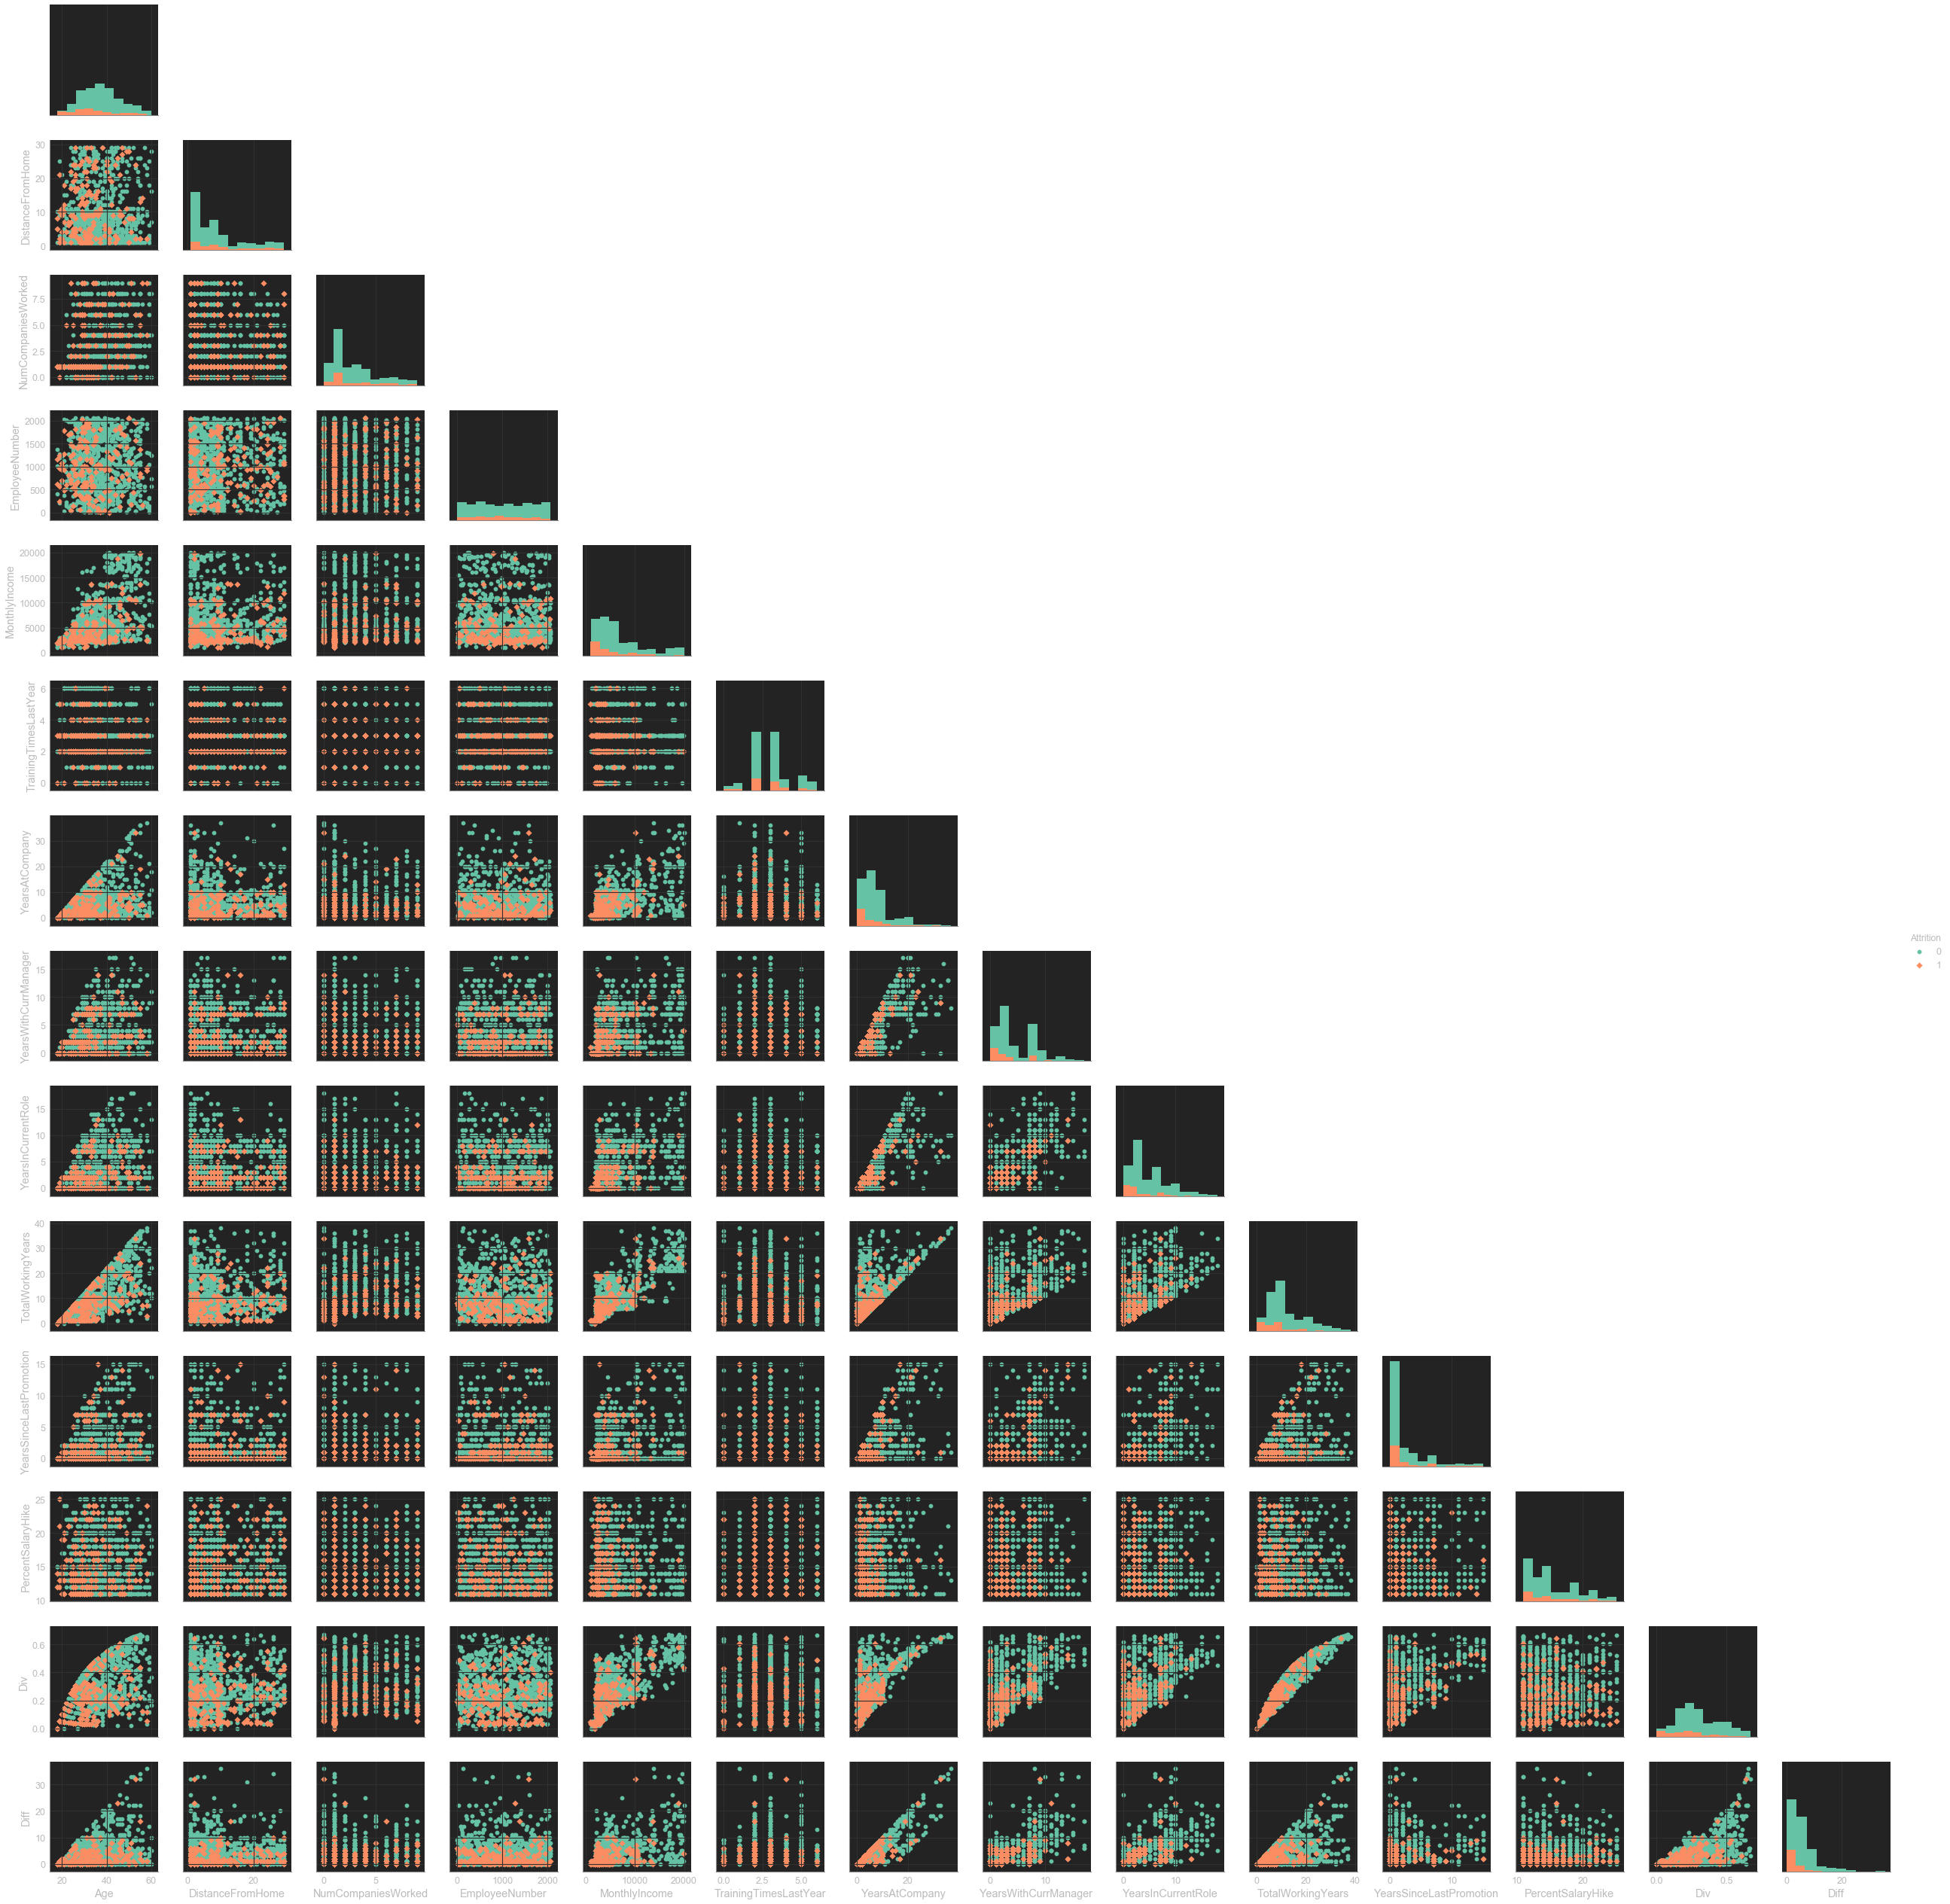

In [30]:
g = sns.PairGrid(df, hue="Attrition",vars=['Age','DistanceFromHome','NumCompaniesWorked','EmployeeNumber','MonthlyIncome','TrainingTimesLastYear','YearsAtCompany','YearsWithCurrManager','YearsInCurrentRole','TotalWorkingYears','YearsSinceLastPromotion','PercentSalaryHike','Div','Diff'],hue_kws={"marker": ["o", "D"]}, palette="Set2",corner=True)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [31]:
X = df.drop(['Attrition'], axis=1)
y = df.Attrition
X_test = df_test

In [31]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print best features

                      Specs      Score
10                  JobRole  74.360023
15                 OverTime  67.923467
26                      Div  40.471819
22       YearsInCurrentRole  35.236033
19        TotalWorkingYears  35.156264
12            MaritalStatus  31.801449
27                     Diff  31.307366
13            MonthlyIncome  26.953415
21           YearsAtCompany  25.938265
24     YearsWithCurrManager  25.386644
0                       Age  23.535029
1            BusinessTravel  20.365025
18         StockOptionLevel  17.125121
9            JobInvolvement  15.009099
11          JobSatisfaction  11.958309
2                Department  11.564844
5            EducationField  11.522000
7   EnvironmentSatisfaction   7.027034
3          DistanceFromHome   6.649363
20    TrainingTimesLastYear   5.829287
25       CommunicationSkill   5.646087
6            EmployeeNumber   1.312192
23  YearsSinceLastPromotion   1.293655
4                 Education   0.893752
14       NumCompaniesWork

In [32]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print 10 best features

                      Specs     Score
19        TotalWorkingYears  0.051116
10                  JobRole  0.038475
15                 OverTime  0.034390
26                      Div  0.026047
12            MaritalStatus  0.024304
20    TrainingTimesLastYear  0.018693
0                       Age  0.015974
21           YearsAtCompany  0.014378
18         StockOptionLevel  0.013932
7   EnvironmentSatisfaction  0.012962
24     YearsWithCurrManager  0.012798
22       YearsInCurrentRole  0.009991
25       CommunicationSkill  0.007498
27                     Diff  0.007009
11          JobSatisfaction  0.005759
13            MonthlyIncome  0.003085
23  YearsSinceLastPromotion  0.002381
8                    Gender  0.002073
4                 Education  0.001848
16        PercentSalaryHike  0.001143
5            EducationField  0.000002
1            BusinessTravel  0.000000
17        PerformanceRating  0.000000
9            JobInvolvement  0.000000
6            EmployeeNumber  0.000000
3          D

In [33]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print 10 best features

                      Specs         Score
13            MonthlyIncome  89235.029616
6            EmployeeNumber    472.023141
19        TotalWorkingYears    182.611775
27                     Diff    159.124976
21           YearsAtCompany    140.857210
22       YearsInCurrentRole    110.277509
24     YearsWithCurrManager     79.093720
0                       Age     51.960275
3          DistanceFromHome     47.682786
15                 OverTime     45.625417
18         StockOptionLevel     15.426502
23  YearsSinceLastPromotion      6.153355
11          JobSatisfaction      5.081127
1            BusinessTravel      5.050041
10                  JobRole      4.046789
25       CommunicationSkill      3.694860
20    TrainingTimesLastYear      3.453813
26                      Div      3.211707
7   EnvironmentSatisfaction      3.070524
9            JobInvolvement      2.686563
14       NumCompaniesWorked      1.539452
12            MaritalStatus      0.800683
4                 Education      0

[0.04360885 0.02958027 0.02121064 0.04339207 0.02906227 0.03170097
 0.03663803 0.03898385 0.02517552 0.03438479 0.05196335 0.04001334
 0.04041512 0.04001014 0.03200306 0.06494025 0.03154405 0.01418658
 0.03462631 0.04030462 0.034238   0.03370135 0.03320294 0.03173347
 0.03276156 0.03239339 0.04102768 0.03719753]


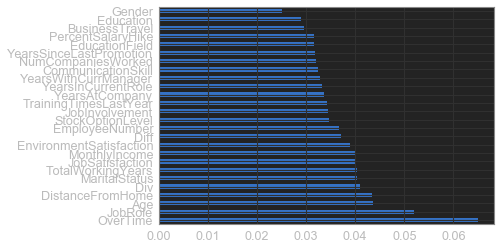

In [34]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.show()

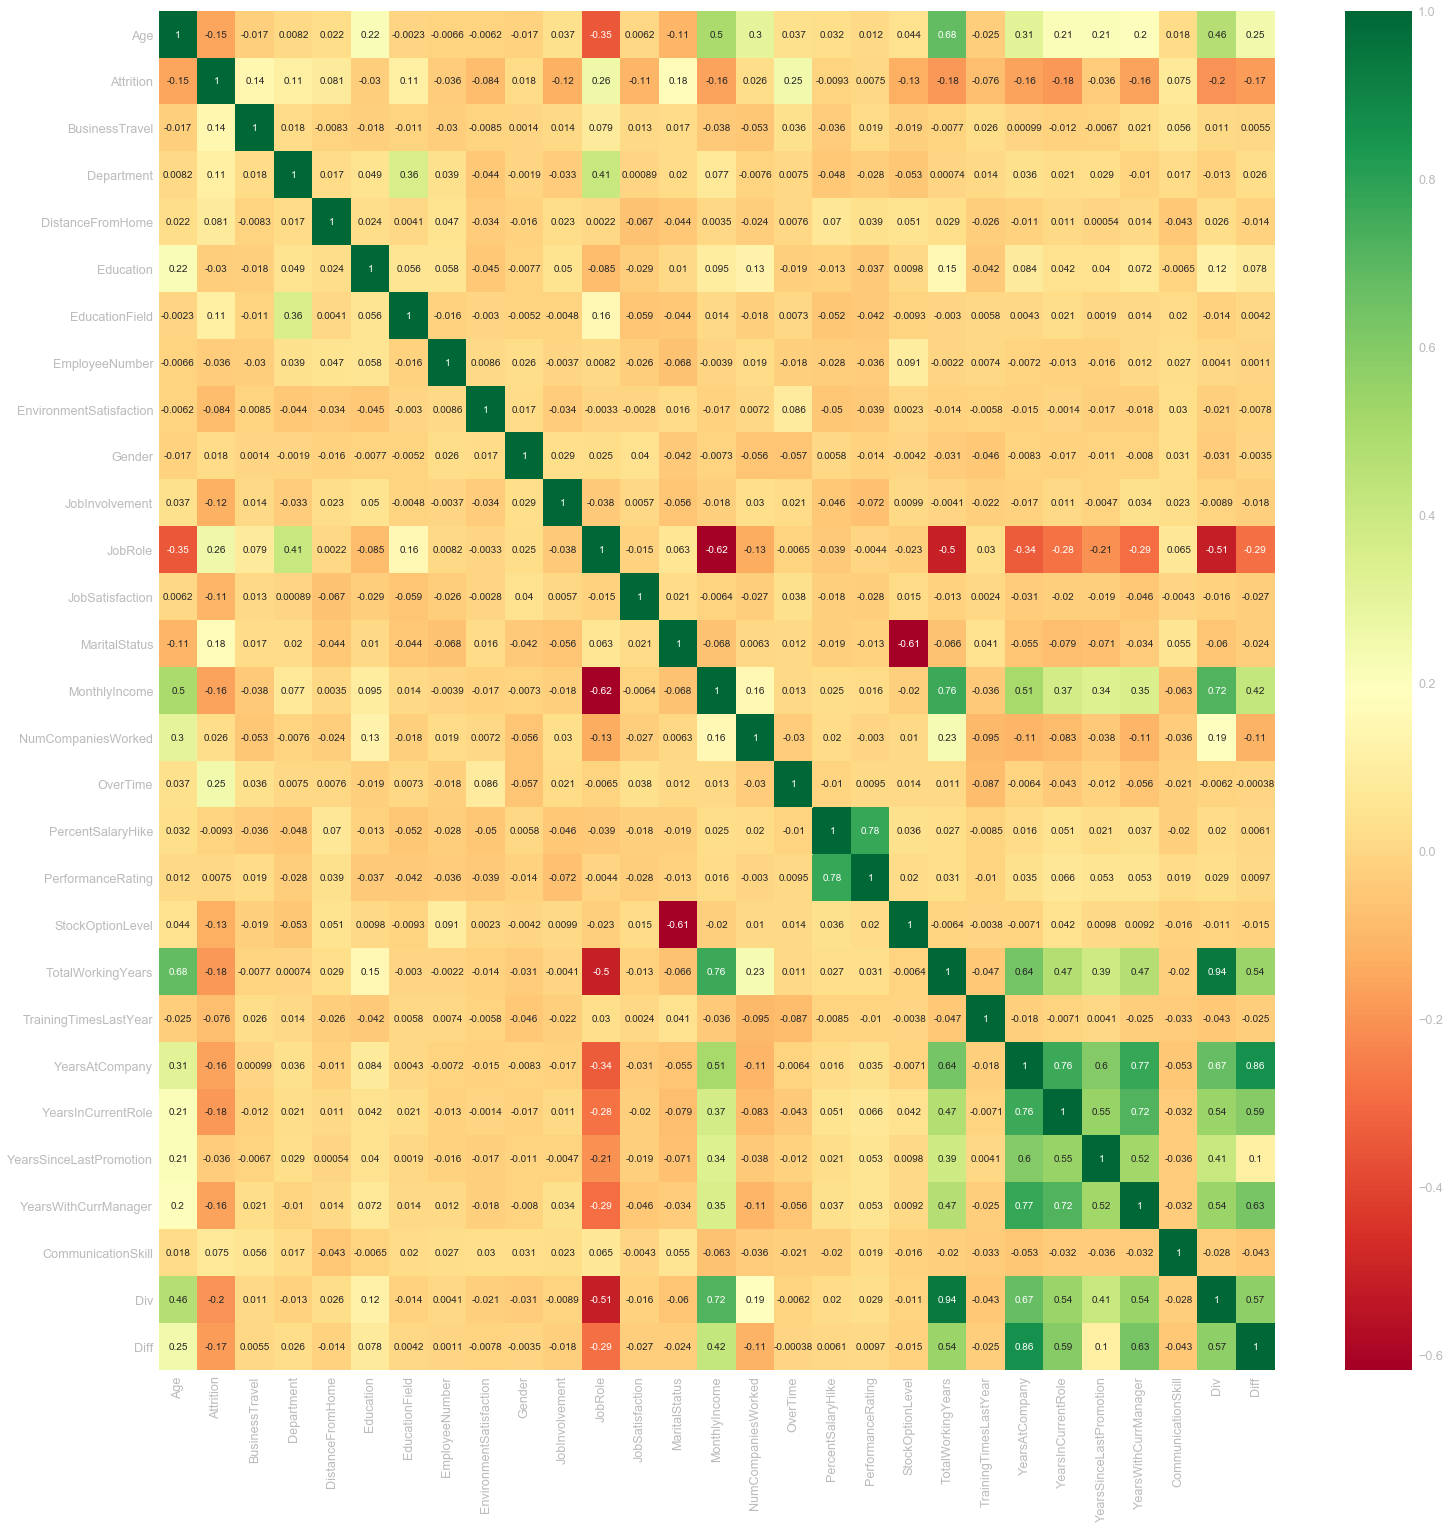

In [39]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

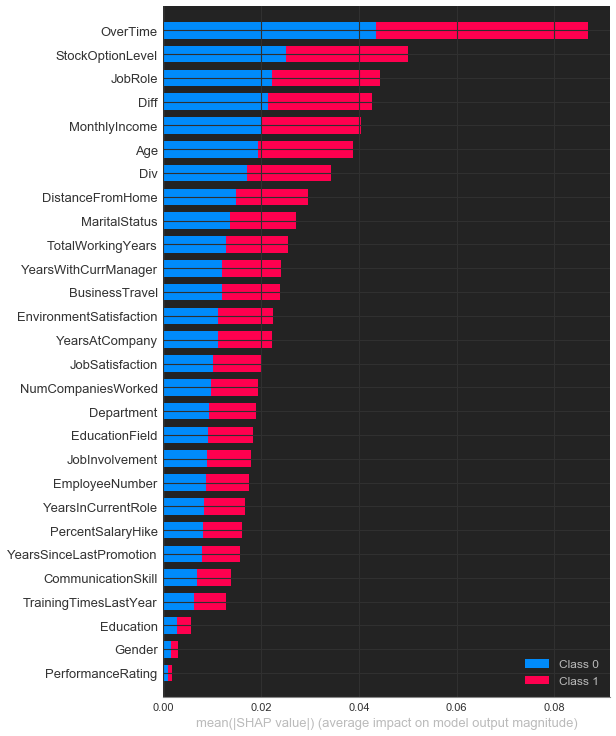

In [40]:
import xgboost
import shap
# # load JS visualization code to notebook
shap.initjs()
# # train XGBoost model

model = RandomForestClassifier(random_state=0).fit(X, y)
# # explain the model's predictions using SHAP values
# # (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X,max_display=30,)

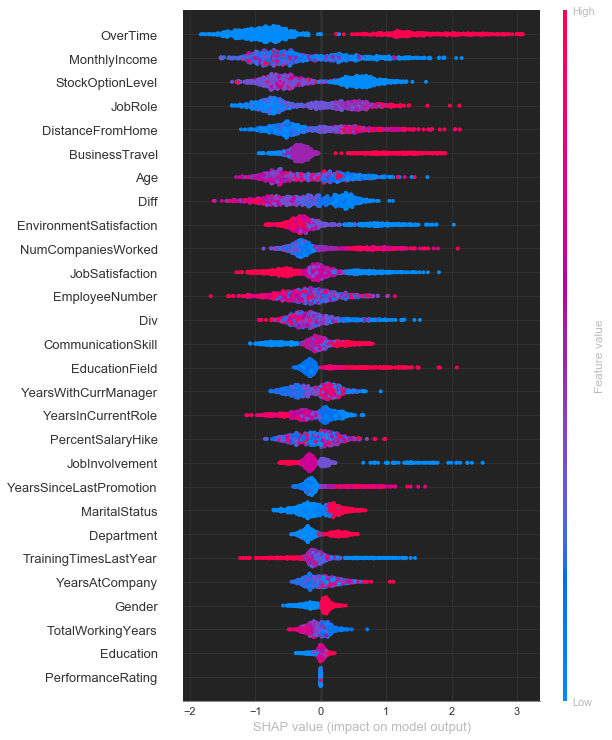

In [41]:
import xgboost
import shap
# # load JS visualization code to notebook
shap.initjs()
# # train XGBoost model

model = XGBClassifier(random_state=0).fit(X, y)
mybooster = model.get_booster()

model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun
# # explain the model's predictions using SHAP values
# # (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(mybooster)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X,max_display=30)

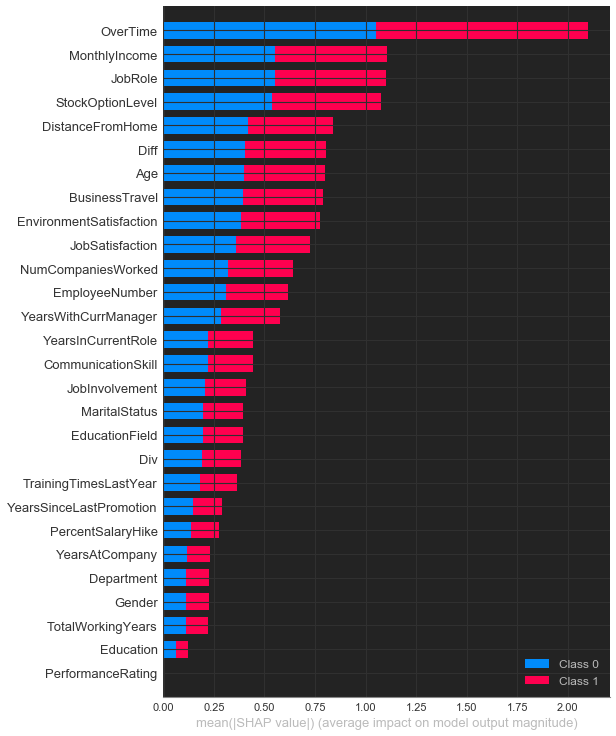

In [42]:
import xgboost
import shap
# # load JS visualization code to notebook
shap.initjs()
# # train XGBoost model

model = LGBMClassifier(random_state=0).fit(X, y)
# mybooster = model.get_booster()

# model_bytearray = mybooster.save_raw()[4:]
# def myfun(self=None):
#     return model_bytearray
# mybooster.save_raw = myfun
# # explain the model's predictions using SHAP values
# # (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X,max_display=30)

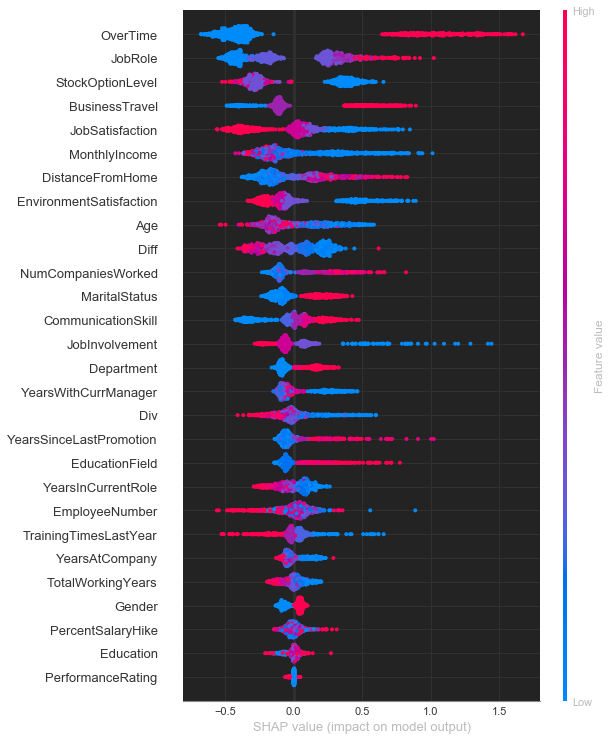

In [43]:
import xgboost
import shap
# # load JS visualization code to notebook
shap.initjs()
# # train XGBoost model

model = CatBoostClassifier(random_state=0,verbose=False).fit(X, y)
# mybooster = model.get_booster()

# model_bytearray = mybooster.save_raw()[4:]
# def myfun(self=None):
#     return model_bytearray
# mybooster.save_raw = myfun
# # explain the model's predictions using SHAP values
# # (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X,max_display=30,)

In [32]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Div', 'Diff'],
      dtype='object')

In [33]:
X.drop(['Gender','Education','PerformanceRating'],inplace=True,axis=1)
X_test.drop(['Gender','Education','PerformanceRating'],inplace=True,axis=1)

In [34]:
def evaluate_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    preds = model.predict(val)
    scores = cross_val_score(model,train, y_train, cv=5, scoring="roc_auc")
    diff = scores.mean() - model.score(val, y_val)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(val, y_val)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_val, preds))

In [35]:
train, val, y_train, y_val = train_test_split(X, y, stratify=y,random_state=42,test_size=0.47)

In [36]:
smt = SMOTE(random_state=0)
scale = RobustScaler()

In [84]:
lgbm = LGBMClassifier(random_state=42)
clf = LGBMClassifier(random_state=42)
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:1.0
Cross V Score: 0.7978536939120218 +/- 0.035199410578287994
Testing Score: 0.851063829787234
Cross & Test Diff: -0.05321013587521228
Standard Deviations Away: -1.511676900295422
[[379  17]
 [ 53  21]]


In [41]:
cat = CatBoostClassifier(random_state=42,silent=True)
clf = CatBoostClassifier(random_state=42,silent=True)
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:0.9962264150943396
Cross V Score: 0.7679944187412792 +/- 0.027664657295933606
Testing Score: 0.8468085106382979
Cross & Test Diff: -0.07881409189701871
Standard Deviations Away: -2.8489090269194657
[[364  32]
 [ 40  34]]


In [85]:
xgb = XGBClassifier(random_state=42)
clf = XGBClassifier(random_state=42)
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:1.0
Cross V Score: 0.8015653227583167 +/- 0.02374306516727327
Testing Score: 0.851063829787234
Cross & Test Diff: -0.04949850702891734
Standard Deviations Away: -2.0847563985607303
[[373  23]
 [ 47  27]]


In [86]:
svm = SVC(random_state=42,probability=True)
clf = SVC(random_state=42)
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:0.9339622641509434
Cross V Score: 0.7795198097965778 +/- 0.037119517355335
Testing Score: 0.8170212765957446
Cross & Test Diff: -0.03750146679916688
Standard Deviations Away: -1.0102897200999565
[[353  43]
 [ 43  31]]


In [87]:
log = LogisticRegression(random_state=42)
clf = LogisticRegression(random_state=42)
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:0.8226415094339623
Cross V Score: 0.8342845340383345 +/- 0.040163246773119624
Testing Score: 0.7872340425531915
Cross & Test Diff: 0.04705049148514295
Standard Deviations Away: 1.171481273686091
[[325  71]
 [ 29  45]]


In [88]:
rfc = RandomForestClassifier(random_state=42)
clf = RandomForestClassifier(random_state=42)
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:1.0
Cross V Score: 0.7777322005581258 +/- 0.04153519300204184
Testing Score: 0.851063829787234
Cross & Test Diff: -0.0733316292291083
Standard Deviations Away: -1.7655299982716675
[[379  17]
 [ 53  21]]


In [89]:
mlp = MLPClassifier(random_state=42)
clf = MLPClassifier(random_state=42)
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:0.9924528301886792
Cross V Score: 0.7906436806932511 +/- 0.03350797359458724
Testing Score: 0.8063829787234043
Cross & Test Diff: -0.01573929803015317
Standard Deviations Away: -0.4697179907261131
[[349  47]
 [ 44  30]]


In [80]:
knn = KNeighborsClassifier()
clf = KNeighborsClassifier()
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)


Training Score:0.8339622641509434
Cross V Score: 0.7191084673569803 +/- 0.06383792204689562
Testing Score: 0.7212765957446808
Cross & Test Diff: -0.0021681283877005297
Standard Deviations Away: -0.0339630163103964
[[293 103]
 [ 28  46]]


In [81]:
ada =  AdaBoostClassifier(random_state=42)
clf = AdaBoostClassifier(random_state=42)
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:0.9037735849056604
Cross V Score: 0.8066828229419108 +/- 0.02454702339177763
Testing Score: 0.8170212765957446
Cross & Test Diff: -0.01033845365383379
Standard Deviations Away: -0.4211693405277318
[[348  48]
 [ 38  36]]


In [93]:
bnb = BernoulliNB()
clf = BernoulliNB()
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:0.5245283018867924
Cross V Score: 0.5770015421899097 +/- 0.06655637389562616
Testing Score: 0.5382978723404256
Cross & Test Diff: 0.038703669849484146
Standard Deviations Away: 0.5815171047355934
[[205 191]
 [ 26  48]]


In [87]:
ensemble = VotingClassifier(estimators=[('rfc', rfc), ('xgbc', xgb), ('knc', knn),
                                        ('nnc', mlp), ('lgbmc', lgbm),('ada',ada),('bnb',bnb),('svm',svm),('log',log),('cat',cat)],
                                         voting='soft', n_jobs=-1)
clf=ensemble
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:0.9924528301886792
Cross V Score: 0.8156356943526474 +/- 0.018007848608087275
Testing Score: 0.8446808510638298
Cross & Test Diff: -0.029045156711182463
Standard Deviations Away: -1.6129165311917584
[[365  31]
 [ 42  32]]


In [90]:
#  pipeline.fit(X,y)
#  y_pred=pipeline.predict_proba(df_test)
#  df_ans=pd.DataFrame(columns=["Id","Attrition"])
#  df_ans['Id']=range(1,471)
#  df_ans.Attrition=y_pred[:,1]
#  df_ans

Id  Attrition
0      1   0.189772
1      2   0.085016
2      3   0.109855
3      4   0.086731
4      5   0.293235
..   ...        ...
465  466   0.597302
466  467   0.838087
467  468   0.100066
468  469   0.112348
469  470   0.125283

[470 rows x 2 columns]

In [91]:
#  df_ans.to_csv('ensemle.csv',index=False)

In [94]:
clf = BernoulliNB()
bnb = clf
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)

In [104]:
parameters = {
    'model__alpha' : [0,0.2,0.4,0.6,0.8,1],
    'model__binarize':[0,0.5,1,5,10],


}

In [105]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s


{'model__alpha': 1, 'model__binarize': 0}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   10.1s finished


In [106]:
evaluate_model(train, y_train, pipeline)

Training Score:0.7603773584905661
Cross V Score: 0.7481942608504075 +/- 0.06375110937235828
Testing Score: 0.7723404255319148
Cross & Test Diff: -0.02414616468150732
Standard Deviations Away: -0.37875677645818046
[[315  81]
 [ 26  48]]


In [155]:
clf = AdaBoostClassifier(random_state=42,n_estimators=1500,learning_rate=0.1)
ada = clf
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)

In [93]:
parameters = {
    'model__learning_rate' : [0.01,0.1,0.5,1,5],
    'model__n_estimators':[100,500,1000,1500,2000],


}

In [94]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.6min finished


{'model__learning_rate': 0.1, 'model__n_estimators': 1500}


In [96]:
evaluate_model(train, y_train, pipeline)

Training Score:0.9509433962264151
Cross V Score: 0.8369684952632739 +/- 0.0346180731094007
Testing Score: 0.8170212765957446
Cross & Test Diff: 0.019947218667529243
Standard Deviations Away: 0.5762082310153906
[[354  42]
 [ 44  30]]


In [156]:
clf = RandomForestClassifier(random_state=42, n_estimators=200, n_jobs=-1, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=2,bootstrap=True)
rfc = clf
steps = [('smt', smt), ('scale', scale), ('model', clf)]
pipeline = Pipeline(steps)

In [101]:
parameters = {
#   'model__bootstrap': [True, False],
#  'model__max_depth': [6,10, 50,100, None],
#  'model__max_features': [2,5,10,'auto','sqrt'],
 'model__min_samples_leaf': [1, 2, 4],
 'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [100,200,500, 1000]
  



}

In [102]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


{'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [104]:
evaluate_model(train, y_train, pipeline)

Training Score:0.9943396226415094
Cross V Score: 0.7944783175442461 +/- 0.027157456288335
Testing Score: 0.8404255319148937
Cross & Test Diff: -0.04594721437064753
Standard Deviations Away: -1.6918821071759702
[[370  26]
 [ 49  25]]


In [136]:
clf = KNeighborsClassifier(p=1,leaf_size=1,n_neighbors=29)
knn = clf
steps = [('smt', smt), ('scale', scale), ('model', clf)]
pipeline = Pipeline(steps)

In [134]:
parameters = {
'model__leaf_size' : list(range(1,50)),
'model__n_neighbors' : list(range(1,30)),
'model__p'  : [1,2]
  



}

In [135]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  2.4min


{'model__leaf_size': 1, 'model__n_neighbors': 29, 'model__p': 1}


[Parallel(n_jobs=-1)]: Done 14210 out of 14210 | elapsed:  2.8min finished


In [137]:
evaluate_model(train, y_train, pipeline)

Training Score:0.7981132075471699
Cross V Score: 0.7459294907101418 +/- 0.05191802349211687
Testing Score: 0.7659574468085106
Cross & Test Diff: -0.020027956098368827
Standard Deviations Away: -0.3857611432648208
[[303  93]
 [ 17  57]]


In [158]:
clf = MLPClassifier(random_state=42,alpha=0.01,hidden_layer_sizes=100,max_iter=1500,learning_rate='adaptive',solver='sgd')
mlp = clf
steps = [('smt', smt), ('scale', scale), ('model', clf)]
pipeline = Pipeline(steps)

In [46]:
parameters = {
#  'model__solver': ['lbfgs','sgd','adam'], 
#  'model__max_iter': [50,100,1000,1500], 
#    'model__alpha': 10.0 ** -np.arange(1, 10), 
#     'model__hidden_layer_sizes':np.arange(10, 15),
    'model__hidden_layer_sizes': [5,10,15,20,25,30,100]
#   'model__learning_rate': ["constant", "invscaling", "adaptive"],
# 'model__activation': ["logistic", "relu", "Tanh"],


}

In [47]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   24.7s finished


{'model__hidden_layer_sizes': 100}


In [45]:
evaluate_model(train, y_train, pipeline)

Training Score:0.9169811320754717
Cross V Score: 0.8147323198942498 +/- 0.02641136009021279
Testing Score: 0.8106382978723404
Cross & Test Diff: 0.004094022021909338
Standard Deviations Away: 0.15500988998391085
[[344  52]
 [ 37  37]]


In [159]:
clf = LogisticRegression(C=1000,penalty='l2',max_iter=5000,random_state=42,solver='saga')
log = clf
steps = [('smt', smt), ('scale', scale), ('model', clf)]
pipeline = Pipeline(steps)

In [53]:
parameters = {
#     'model__penalty' :['l1','l2'],
    'model__C' : [0.1,1,10,100,1000,1e5,10000,1e7],
    'model__max_iter':[100,50,1000,5000,1e5,1e7],
#    'model__solver':['lbfgs','saga','sag']
        



}

In [54]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   17.2s finished


{'model__C': 1000, 'model__max_iter': 5000}


In [52]:
evaluate_model(train, y_train, pipeline)

Training Score:0.8528301886792453
Cross V Score: 0.8439647132261143 +/- 0.03411135111152223
Testing Score: 0.8085106382978723
Cross & Test Diff: 0.03545407492824204
Standard Deviations Away: 1.039362961975032
[[337  59]
 [ 31  43]]


In [166]:
clf = SVC(random_state=42,C=10000,gamma=1e-5,probability=True)
svc = clf
steps = [('smt', smt), ('scale', scale), ('model', clf)]
pipeline = Pipeline(steps)

In [56]:
parameters = {
 
'model__C':[float("1e%d" %i) for i in range(-5,5)],
    'model__gamma':[float("1e%d" %i) for i in range(-8,1)]
   
        



}

In [57]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 435 out of 450 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    3.5s finished


{'model__C': 10000.0, 'model__gamma': 1e-05}


In [58]:
evaluate_model(train, y_train, pipeline)

Training Score:0.8245283018867925
Cross V Score: 0.8312844238819123 +/- 0.04099499346883175
Testing Score: 0.7787234042553192
Cross & Test Diff: 0.0525610196265931
Standard Deviations Away: 1.2821326503333859
[[322  74]
 [ 30  44]]


In [161]:
clf = XGBClassifier(random_state=42,learning_rate=0.5,max_depth = 4,n_estimators = 200,min_child_weight = 1,gamma = 0.2,subsample = 0.7,reg_alpha=0.001,reg_lambda=0.005,colsample_bytree = 0.9)
xgb = clf
steps = [('smt', smt), ('scale', scale), ('model', clf)]
pipeline = Pipeline(steps)

In [86]:
parameters = {
    #     subsample=1
#     'model__learning_rate': [0.05, 0.5, 0.1,1,0.001],
#     'model__max_depth': [4, 8,6 , 10],
#     'model__subsample': [5e-2, 1e-3, 1e-2,.1,0.7],
#     'model__min_child_weight': [1,0.5,0.1,0.05,0.005],
#     'model__gamma': [i/10.0 for i in range(0, 10)],
#     'model__subsample': [i/10.0 for i in range(6, 10)],
#     'model__colsample_bytree': [i/10.0 for i in range(6, 10)],
    'model__reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
    'model__reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.1],
#     'model__n_estimators': [i*100 for i in range(1,10)]


}


In [87]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s


{'model__reg_alpha': 0.001, 'model__reg_lambda': 0.005}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.2s finished


In [88]:
evaluate_model(train, y_train, pipeline)

Training Score:1.0
Cross V Score: 0.8176623889256078 +/- 0.02124187253552104
Testing Score: 0.8340425531914893
Cross & Test Diff: -0.016380164265881514
Standard Deviations Away: -0.7711261913699139
[[366  30]
 [ 48  26]]


In [162]:
clf = CatBoostClassifier(random_state=42,max_depth=10,learning_rate=0.01,iterations=500,verbose=False,l2_leaf_reg=0.05)
cat = clf
steps = [('smt', smt), ('scale', scale), ('model', clf)]
pipeline = Pipeline(steps)

In [129]:
parameters = {
#     'model__max_depth'         : [6,8,10],
#                       'model__learning_rate' : [0.01, 0.05, 0.1],
#                       'model__iterations'    : [40, 50, 60,100,500],
#   'model__bagging_temperature': [0.4, 0.2, 0.1, 10],
    'model__l2_leaf_reg':[0, 0.001, 0.005, 0.01, 0.05, 0.1],


}

In [130]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.7min finished


{'model__l2_leaf_reg': 0.05}


In [131]:
evaluate_model(train, y_train, pipeline)

Training Score:1.0
Cross V Score: 0.8017206433135051 +/- 0.030600326449692114
Testing Score: 0.8531914893617021
Cross & Test Diff: -0.05147084604819696
Standard Deviations Away: -1.682035847977525
[[376  20]
 [ 49  25]]


In [163]:
clf = LGBMClassifier(random_state=42,learning_rate=0.1,max_depth=6,min_child_weight=10,subsample=0.1,min_child_samples=40,reg_alpha=0.05,colsample_bytree=0.7,boosting_type='goss',n_estimators=200,num_leaves=20,)
lgbm = clf
steps = [('smt', smt), ('scale', scale), ('model', clf)]
pipeline = Pipeline(steps)

In [146]:
parameters = {

#              'model__learning_rate': [0.05, 0.5, 0.1],
#         'model__max_depth': [4, 6, 8, 10],
#         'model__min_child_weight': [ 0.001,10,25,1,5,0.1, 0.05,],

#         'model__subsample': [i/10.0 for i in range(1, 10)],
#         'model__colsample_bytree': [i/10.0 for i in range(6, 10)],
        'model__reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
        'model__reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.1],
#             'model__n_estimators': [100, 200, 400, 500, 800, 1000],
#         'model__num_leaves': [20,30,40, 60, 80],
#         'model__boosting_type': ['dart', 'gbdt', 'goss', 'rf'],
            'model__min_child_samples': [15, 20,30,40]

}

In [147]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5,scoring='roc_auc',verbose=True,n_jobs=-1)
grid.fit(train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.2s


{'model__min_child_samples': 40, 'model__reg_alpha': 0.05, 'model__reg_lambda': 0}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    8.6s finished


In [149]:
evaluate_model(train, y_train, pipeline)

Training Score:0.9679245283018868
Cross V Score: 0.841481787471543 +/- 0.03667705708983457
Testing Score: 0.8361702127659575
Cross & Test Diff: 0.00531157470558552
Standard Deviations Away: 0.14482008991549322
[[361  35]
 [ 42  32]]


In [150]:
 pipeline.fit(X,y)
 y_pred=pipeline.predict_proba(df_test)
 df_ans=pd.DataFrame(columns=["Id","Attrition"])
 df_ans['Id']=range(1,471)
 df_ans.Attrition=y_pred[:,1]
 df_ans

Id  Attrition
0      1   0.003066
1      2   0.012643
2      3   0.241242
3      4   0.023238
4      5   0.119565
..   ...        ...
465  466   0.358570
466  467   0.919513
467  468   0.066676
468  469   0.026211
469  470   0.003227

[470 rows x 2 columns]

In [151]:
df_ans.to_csv('lgbest.csv',index=False)

In [167]:
ensemble = VotingClassifier(estimators=[('rfc', rfc), ('xgbc', xgb), 
                                        ('nnc', mlp), ('lgbmc', lgbm),('ada',ada),('svm',svc),('log',log),('cat',cat)],
                                         voting='soft', n_jobs=-1)
clf=ensemble
steps=[('smt',smt),('scale',scale),('model',clf)]
pipeline = Pipeline(steps)
evaluate_model(train, y_train, pipeline)

Training Score:0.9792452830188679
Cross V Score: 0.8431283505911729 +/- 0.03374285426149385
Testing Score: 0.8489361702127659
Cross & Test Diff: -0.005807819621593047
Standard Deviations Away: -0.17211998654840308
[[366  30]
 [ 41  33]]


In [168]:
 pipeline.fit(X,y)
 y_pred=pipeline.predict_proba(df_test)
 df_ans=pd.DataFrame(columns=["Id","Attrition"])
 df_ans['Id']=range(1,471)
 df_ans.Attrition=y_pred[:,1]
 df_ans

Id  Attrition
0      1   0.235979
1      2   0.085120
2      3   0.342044
3      4   0.206988
4      5   0.282642
..   ...        ...
465  466   0.686574
466  467   0.861145
467  468   0.113378
468  469   0.087143
469  470   0.084139

[470 rows x 2 columns]

In [169]:
df_ans.to_csv('ensemble_best.csv',index=False)